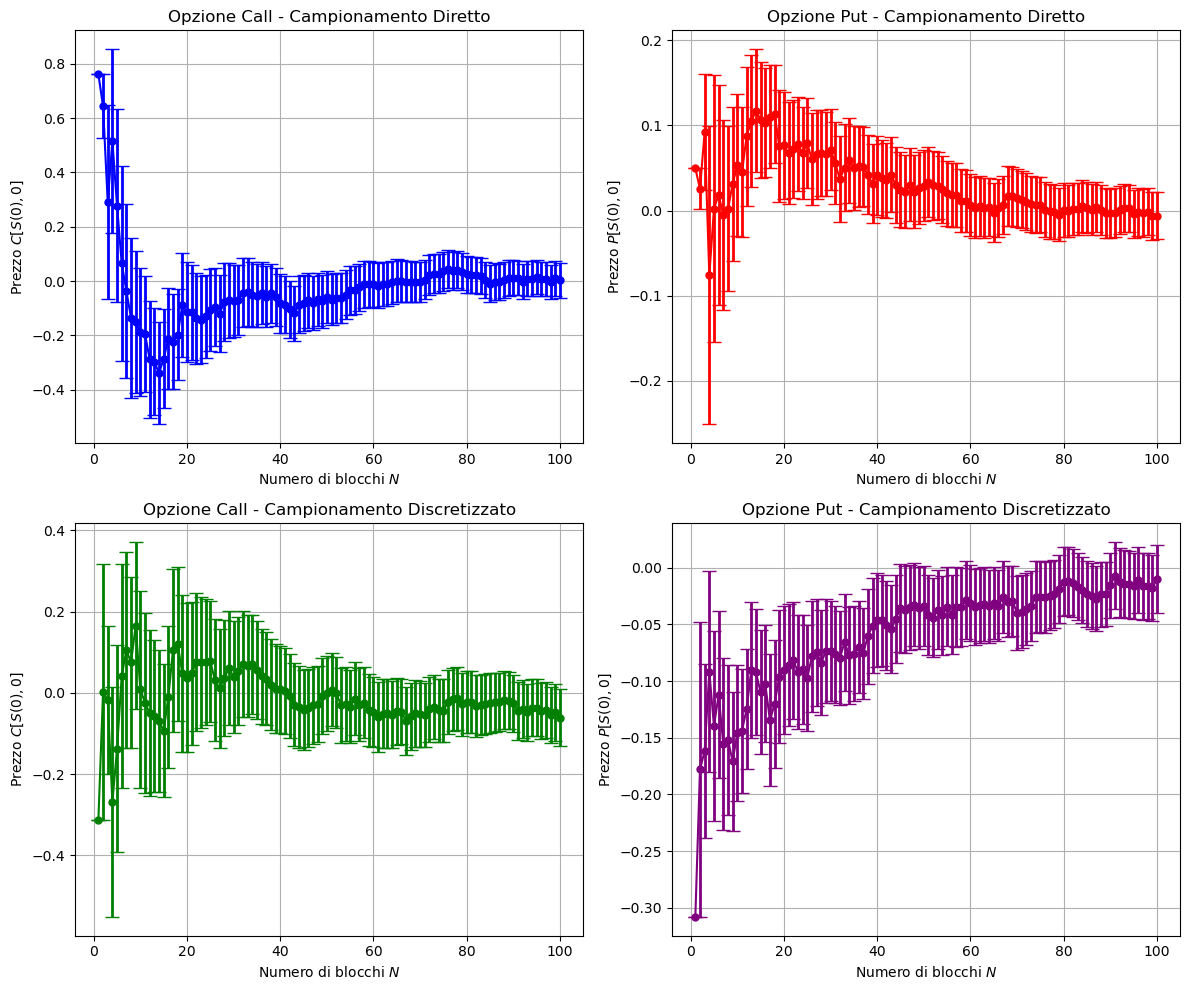

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ──────────────────────────────────────────────────────────────────────────────
# Caricamento dei dati dai file di output del Monte Carlo
# ──────────────────────────────────────────────────────────────────────────────
#
# I file “.txt” sono stati generati da un precedente script di Monte Carlo che:
#  1. Calcola il prezzo di un’opzione europea (call o put) usando:
#     a) campionamento diretto del prezzo finale S(T) per la GBM,
#     b) campionamento “discretizzato” della GBM mediante n=100 passi temporali.
#  2. Per ciascuna di queste quattro configurazioni (direct_call, direct_put,
#     discretized_call, discretized_put), utilizza un numero molto grande di simulazioni
#     (M ≥ 10^4) e raggruppa i risultati in N blocchi per stimare la media e l’incertezza
#     statistica tramite data blocking.
#
# Ogni file ha tre colonne:
#    colonna 0 = N_blocks (numero di blocchi usato nel data blocking)
#    colonna 1 = valore medio stimato del payoff attualizzato (prezzo dell’opzione)
#    colonna 2 = incertezza statistica (errore standard della media stimata)
#
data_direct_call        = np.loadtxt("direct_call.txt")  
data_direct_put         = np.loadtxt("direct_put.txt")
data_discretized_call   = np.loadtxt("discretized_call.txt")
data_discretized_put    = np.loadtxt("discretized_put.txt")

# ──────────────────────────────────────────────────────────────────────────────
# Estrazione delle colonne: N_blocks, prezzo medio e incertezza
# ──────────────────────────────────────────────────────────────────────────────
#
# Da ogni array 2D “data_*” prendiamo le colonne corrispondenti a:
#   [0] = N_blocks
#   [1] = prezzo medio stimato
#   [2] = errore standard stimato
#
N_blocks = data_direct_call[:, 0]            # array di dimensione N (numero di blocchi)
direct_call_price   = data_direct_call[:, 1] # prezzo medio call (direct sampling)
direct_call_error   = data_direct_call[:, 2] # incertezza call (direct sampling)

direct_put_price    = data_direct_put[:, 1]  # prezzo medio put (direct sampling)
direct_put_error    = data_direct_put[:, 2]  # incertezza put (direct sampling)

discretized_call_price  = data_discretized_call[:, 1]  # prezzo medio call (discretized sampling)
discretized_call_error  = data_discretized_call[:, 2]  # incertezza call (discretized sampling)

discretized_put_price   = data_discretized_put[:, 1]   # prezzo medio put (discretized sampling)
discretized_put_error   = data_discretized_put[:, 2]   # incertezza put (discretized sampling)

# ──────────────────────────────────────────────────────────────────────────────
# Creazione della figura con quattro subplot (2×2)
# ──────────────────────────────────────────────────────────────────────────────
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ──────────────────────────────────────────────────────────────────────────────
# 1) Opzione Call - Campionamento Diretto
# ──────────────────────────────────────────────────────────────────────────────
#
# errorbar(x, y, yerr) traccia i punti (x, y) con barre d’errore “yerr” in verticale.
# fmt='o-' indica un tratto continuo con marker circolari.
# capsize=5 imposta la lunghezza delle “barrette” orizzontali alle estremità delle barre d’errore.
#
axes[0, 0].errorbar(
    N_blocks, 
    direct_call_price, 
    yerr=direct_call_error, 
    fmt='o-', 
    capsize=5, 
    elinewidth=2, 
    markersize=5, 
    color="b"
)
axes[0, 0].set_xlabel("Numero di blocchi $N$")
axes[0, 0].set_ylabel("Prezzo $C[S(0),0]$")
axes[0, 0].set_title("Opzione Call - Campionamento Diretto")
axes[0, 0].grid(True)

# ──────────────────────────────────────────────────────────────────────────────
# 2) Opzione Put - Campionamento Diretto
# ──────────────────────────────────────────────────────────────────────────────
#
# Simile al primo, ma in rosso e per il payoff di put-option (P[S(0),0]).
#
axes[0, 1].errorbar(
    N_blocks, 
    direct_put_price, 
    yerr=direct_put_error, 
    fmt='o-', 
    capsize=5, 
    elinewidth=2, 
    markersize=5, 
    color="r"
)
axes[0, 1].set_xlabel("Numero di blocchi $N$")
axes[0, 1].set_ylabel("Prezzo $P[S(0),0]$")
axes[0, 1].set_title("Opzione Put - Campionamento Diretto")
axes[0, 1].grid(True)

# ──────────────────────────────────────────────────────────────────────────────
# 3) Opzione Call - Campionamento Discretizzato
# ──────────────────────────────────────────────────────────────────────────────
#
# Passiamo al secondo caso: metodi di campionamento per il GBM discretizzato.
# Le barre d’errore rappresentano la deviazione standard della media stimata
# calcolata con la tecnica del “data blocking” (N blocchi).
#
axes[1, 0].errorbar(
    N_blocks, 
    discretized_call_price, 
    yerr=discretized_call_error, 
    fmt='o-', 
    capsize=5, 
    elinewidth=2, 
    markersize=5, 
    color="g"
)
axes[1, 0].set_xlabel("Numero di blocchi $N$")
axes[1, 0].set_ylabel("Prezzo $C[S(0),0]$")
axes[1, 0].set_title("Opzione Call - Campionamento Discretizzato")
axes[1, 0].grid(True)

# ──────────────────────────────────────────────────────────────────────────────
# 4) Opzione Put - Campionamento Discretizzato
# ──────────────────────────────────────────────────────────────────────────────
#
# Ultimo subplot: payoff di put calcolato con GBM discretizzato.
#
axes[1, 1].errorbar(
    N_blocks, 
    discretized_put_price, 
    yerr=discretized_put_error, 
    fmt='o-', 
    capsize=5, 
    elinewidth=2, 
    markersize=5, 
    color="purple"
)
axes[1, 1].set_xlabel("Numero di blocchi $N$")
axes[1, 1].set_ylabel("Prezzo $P[S(0),0]$")
axes[1, 1].set_title("Opzione Put - Campionamento Discretizzato")
axes[1, 1].grid(True)

# ──────────────────────────────────────────────────────────────────────────────
# Spaziatura e visualizzazione finale
# ──────────────────────────────────────────────────────────────────────────────
plt.tight_layout()  # Regola automaticamente la distanza fra i subplot
plt.show()


## Paragrafo Teorico e Descrizione dei Grafici

In questo esercizio sono stati calcolati i prezzi di opzioni plain vanilla europee (call e put) mediante due metodi Monte Carlo:

### 1. **Campionamento Diretto del Prezzo Finale \( S(T) \)**

La formula del moto browniano geometrico (GBM) permette di campionare direttamente il prezzo finale:

$$
S(T) = S(0) \cdot \exp\left[\left(r - \frac{1}{2} \sigma^2\right)T + \sigma W(T)\right], \quad W(T) \sim \mathcal{N}(0,T)
$$

I payoff vengono calcolati come:

- Call: $$ \max(S(T) - K, 0) $$
- Put: $$ \max(K - S(T), 0) $$

Questi valori sono poi scontati al tempo iniziale con il tasso \( r \).

Con il **data blocking**, suddividiamo le \( M \) simulazioni in \( N \) blocchi e calcoliamo media e incertezza (errore standard) sul prezzo stimato.

---

### 2. **Campionamento Discretizzato del GBM**

Il tempo \([0, T]\) viene diviso in 100 passi di ampiezza $ \Delta t = T / 100 $, e il prezzo evolve iterativamente:

$$
S_{i+1} = S_i \cdot \exp\left[\left(r - \frac{1}{2} \sigma^2\right)\Delta t + \sigma \sqrt{\Delta t} \cdot Z_{i+1}\right], \quad Z_{i+1} \sim \mathcal{N}(0,1)
$$

Alla fine della traiettoria si calcola il payoff come nel caso diretto.

---

## Descrizione dei Grafici

I quattro grafici mostrano l'evoluzione del prezzo stimato (con barre d’errore) al crescere del numero di blocchi \( N \):

- **In alto a sinistra**: **Call – Metodo Diretto** (cerchi blu)  
  Per pochi blocchi, l’incertezza è elevata. Aumentando \( N \), le stime si stabilizzano e convergono al valore teorico di Black–Scholes.

- **In alto a destra**: **Put – Metodo Diretto** (cerchi rossi)  
  Comportamento analogo alla call, ma con valori medi inferiori. Anche qui l’errore standard cala con l’aumentare di \( N \).

- **In basso a sinistra**: **Call – Metodo Discretizzato** (cerchi verdi)  
  L’incertezza iniziale è maggiore a causa dei 100 passi temporali. Il prezzo medio converge, ma in modo più lento.

- **In basso a destra**: **Put – Metodo Discretizzato** (cerchi viola)  
  Simile al caso call, con valori medi inferiori o prossimi a zero. L’errore standard diminuisce con \( N \), mostrando buona convergenza.

---

## Considerazioni Conclusive

- L’errore statistico decresce come $$ \frac{1}{\sqrt{N}} $$, coerentemente con la teoria del data blocking.
- Il **campionamento diretto** è più efficiente e preciso per opzioni vanilla.
- Il **campionamento discretizzato** è fondamentale per opzioni path-dependent, anche se introduce più varianza iniziale.
- Entrambi i metodi convergono correttamente al prezzo teorico di Black–Scholes con un numero sufficiente di blocchi.

I grafici confermano l’efficacia dei metodi Monte Carlo, mostrando chiaramente la convergenza delle stime e la riduzione dell’incertezza all’aumentare di \( N \).
